In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

In [2]:
police_deaths = pd.read_csv("police_deaths_538.csv")
police_deaths.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


What are the main causes how police officers were killed

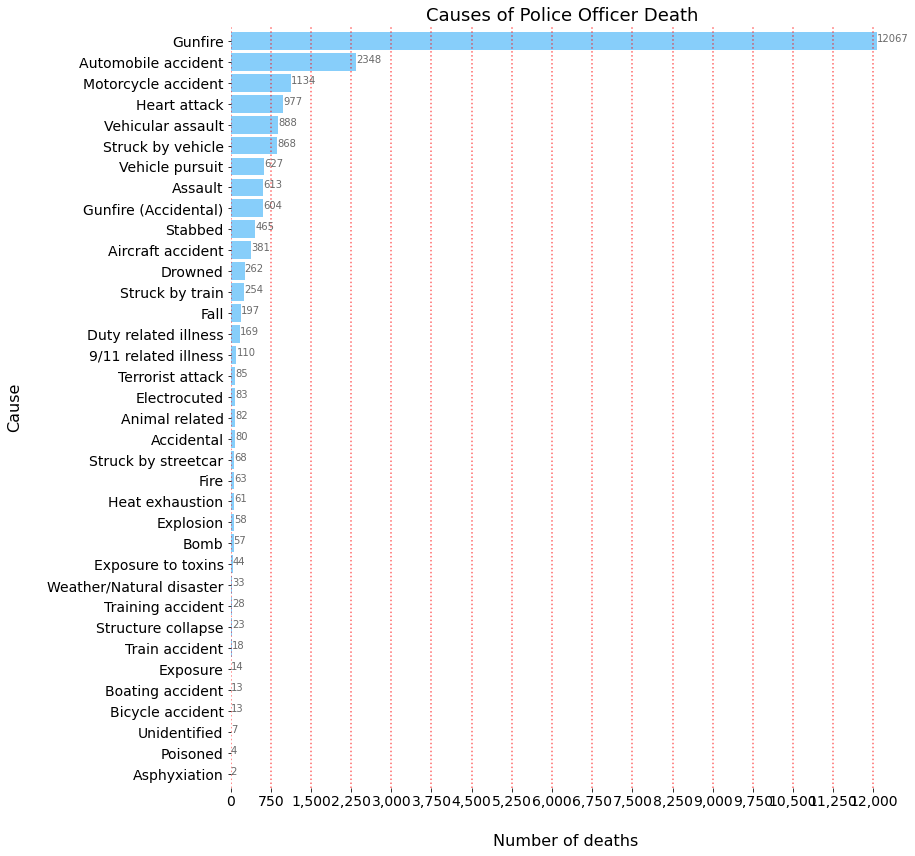

In [24]:
ax = pd.pivot_table(police_deaths, index='cause_short', values=['cause'], aggfunc="count").sort_values(
    "cause", axis = 0, ascending = True).plot.barh(figsize=(12,14),color='lightskyblue', width=0.85, xlim=[0, 12500], legend=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(750))

vals = ax.get_xticks()
for tick in vals:
    ax.axvline( x =tick, linestyle='dotted', alpha=0.6, color='red', zorder=2)

    
ax.set_xlabel("Number of deaths", labelpad=25, size=16)
ax.set_ylabel("Cause", labelpad=25, size=16)
ax.set_title("Causes of Police Officer Death ", size=18)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
totals = []
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.40, str(round((i.get_width()))),fontsize=10,
color='dimgrey')

The causes of the deaths of the police officers it seems that the main cause is **"Gunshots"**, followed by car and car accidents. Heart attack was also a major cause.
From the graph, however, it seems clear that the firearm is certainly the main cause of the killings of the agents with a wide detachment from other causes.

In [7]:
fatal_encounters= pd.read_csv("fatal_encounters_dot_org.csv")
#fatal_encounters_dot_org.info()
#fatal_encounters.head()

In [8]:
fatal_encounters = fatal_encounters.iloc[:,[0,2,1,3,4,5,8,10,11,15,16,18,19,22,27]]
fatal_encounters.head()

,Unique ID,Subject's age,Subject's name,Subject's gender,Subject's race,Subject's race with imputations,Date of injury resulting in death (month/day/year),Location of death (city),Location of death (state),Latitude,Longitude,Cause of death,A brief description of the circumstances surrounding the death,Link to news article or photo of official document,Unique identifier (redundant)
0,25746.0,17,Samuel H. Knapp,Male,European-American/White,European-American/White,01/01/2000,Willits,CA,39.470883,-123.361751,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,https://drive.google.com/file/d/10DisrV8K5ReP1...,25746.0
1,25747.0,21,Mark A. Horton,Male,African-American/Black,African-American/Black,01/01/2000,Detroit,MI,42.404526,-83.092274,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,25747.0
2,25748.0,19,Phillip A. Blurbridge,Male,African-American/Black,African-American/Black,01/01/2000,Detroit,MI,42.404526,-83.092274,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,25748.0
3,25749.0,23,Mark Ortiz,Male,Hispanic/Latino,Hispanic/Latino,01/01/2000,Carlsbad,NM,32.450080,-104.237643,Vehicle,A motorcycle was allegedly being driven errati...,https://drive.google.com/file/d/1qAEefRjX_aTtC...,25749.0
4,1.0,24,LaTanya Janelle McCoy,Female,African-American/Black,African-American/Black,01/02/2000,Sacramento,CA,38.473949,-121.433776,Vehicle,LaTanya Janelle McCoy's car was struck from be...,http://www.recordnet.com/article/20000110/A_NE...,1.0


Text(0.5, 1.0, 'Causes of People Death per State  ')

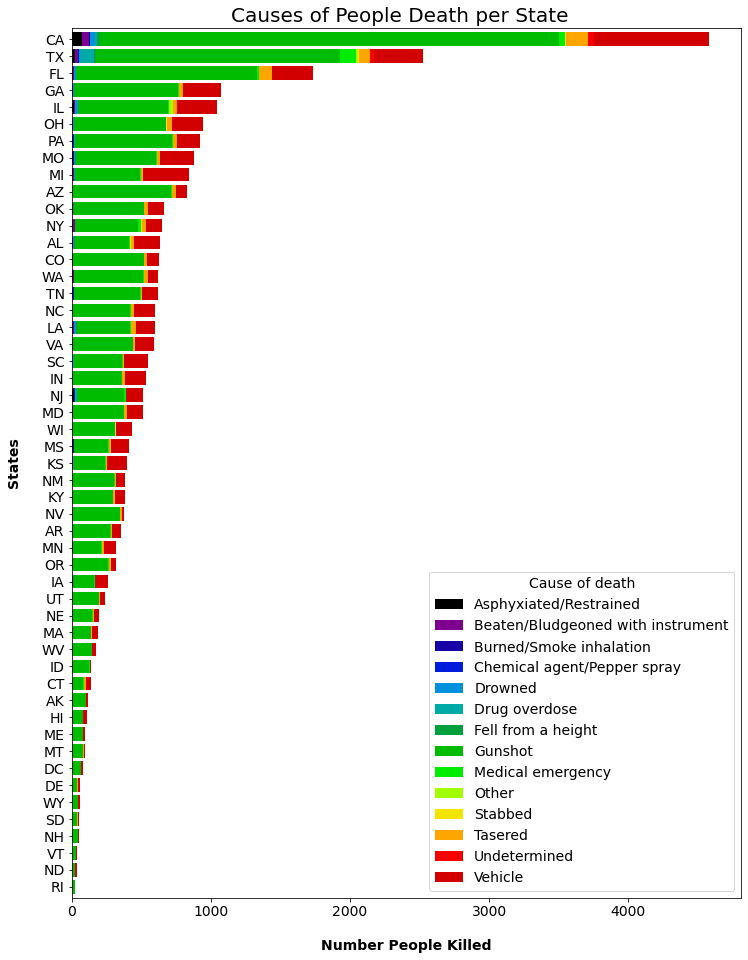

In [25]:
#police_deaths_by_state = pd.pivot_table(police_deaths,index='state', values=['cause'], columns = ['cause_short'], aggfunc="count").fillna(value=0)
fatal_encounters_pv = pd.pivot_table(fatal_encounters,index=['Location of death (state)'],values = ['Unique ID'],columns = ['Cause of death'], aggfunc="count").fillna(value=0)
fatal_encounters_pv.columns = fatal_encounters_pv.columns.droplevel()
fatal_encounters_pv.loc[:,'Total'] = fatal_encounters_pv.sum(axis=1)
fatal_encounters_pv.sort_values("Total", axis = 0, ascending = True, inplace=True)
colors2 = plt.cm.nipy_spectral(np.linspace(0, 1, 15))
ax2 = fatal_encounters_pv.drop(['Total'], axis = 1).plot.barh(figsize=(12,16),stacked=True, width=0.80,color=colors2 )
ax2.set_xlabel("Number People Killed", labelpad=20, weight='bold',size=14)
ax2.set_ylabel("States", labelpad=20, weight='bold', size=14)
ax2.set_title("Causes of People Death per State  ", size=20)
#fatal_encounters_pv.head()

Making a distinction by state, it seems clear again that the main cause that led to the death of people is gunfire. This followed by killing by vehicles.
California, Texas and Florida appear to be the states with the most casualties.

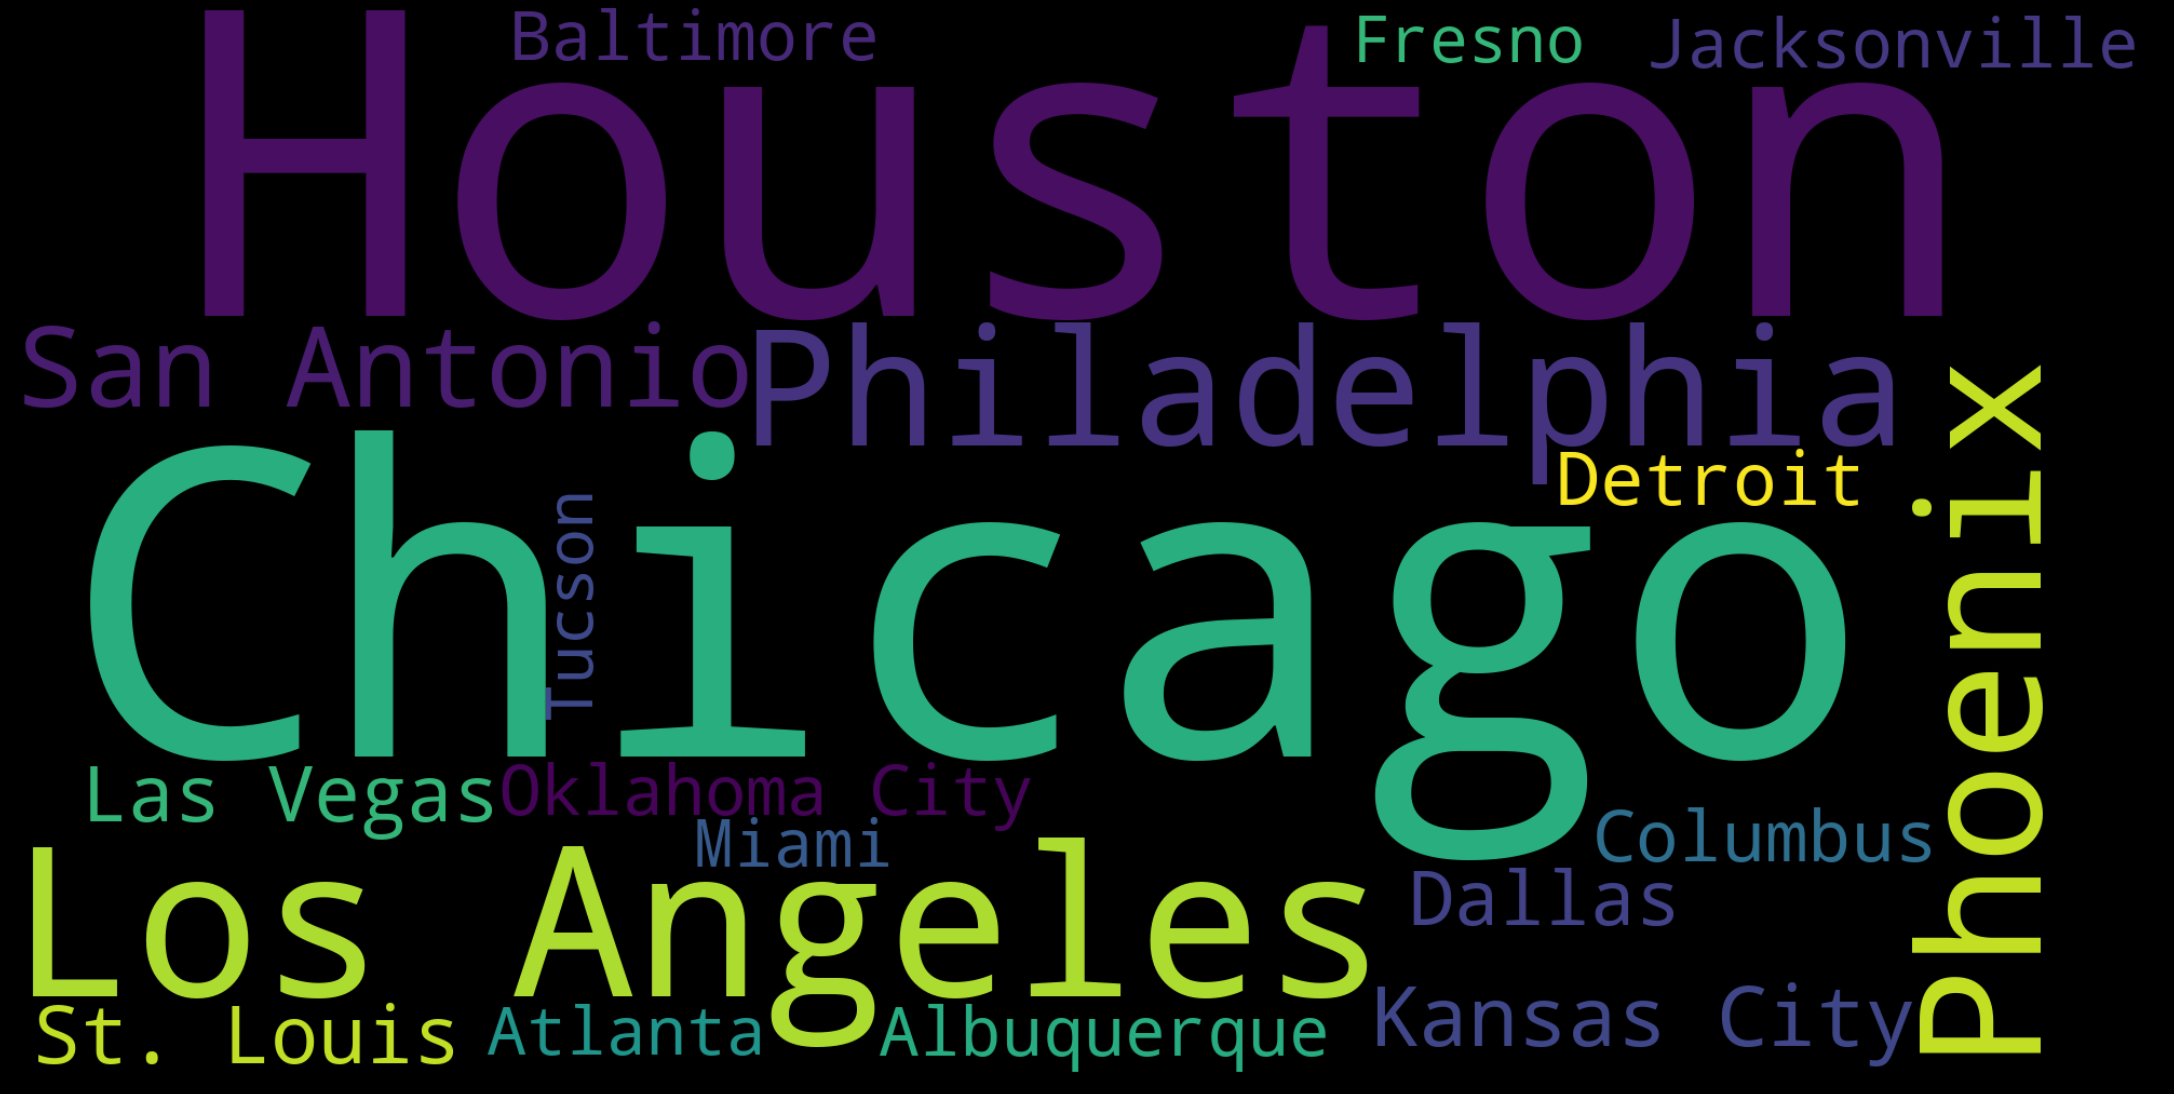

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fatal_encounters.rename(columns = {"Location of death (city)" : "Location"} , inplace=True)
text_list = []
for i in range(len(fatal_encounters['Location'])):
    text_list.append(str(fatal_encounters['Location'][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',max_words=20).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analyzing the graph for the top twenty, it seems clear that **Chicago** was the bloodiest followed by Houston and Los Angeles. 

In [19]:
shootings = pd.read_csv("shootings_wash_post.csv")
shootings.describe()
d = {'W': 'White', 'B': 'Black','A': 'Asian','N': 'Native','H':'Hispanic', 'O': 'Other'}
gend = {'M': 'Male', 'F': 'Female'}
shootings["gender"] = shootings["gender"].map(gend)
shootings["race"] = shootings["race"].map(d)
shootings.isna().sum()
shootings['armed'].fillna('No', inplace=True)
shootings['age'].fillna(0, inplace=True)
shootings['race'].fillna('Other', inplace=True)
shootings['flee'].fillna('Not specified', inplace=True)
shootings.rename(columns = {"signs_of_mental_illness" : "Signs Mental illness"} , inplace=True)
shootings.isna().sum()
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,Signs Mental illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False


What were the 10 most dangerous cities?

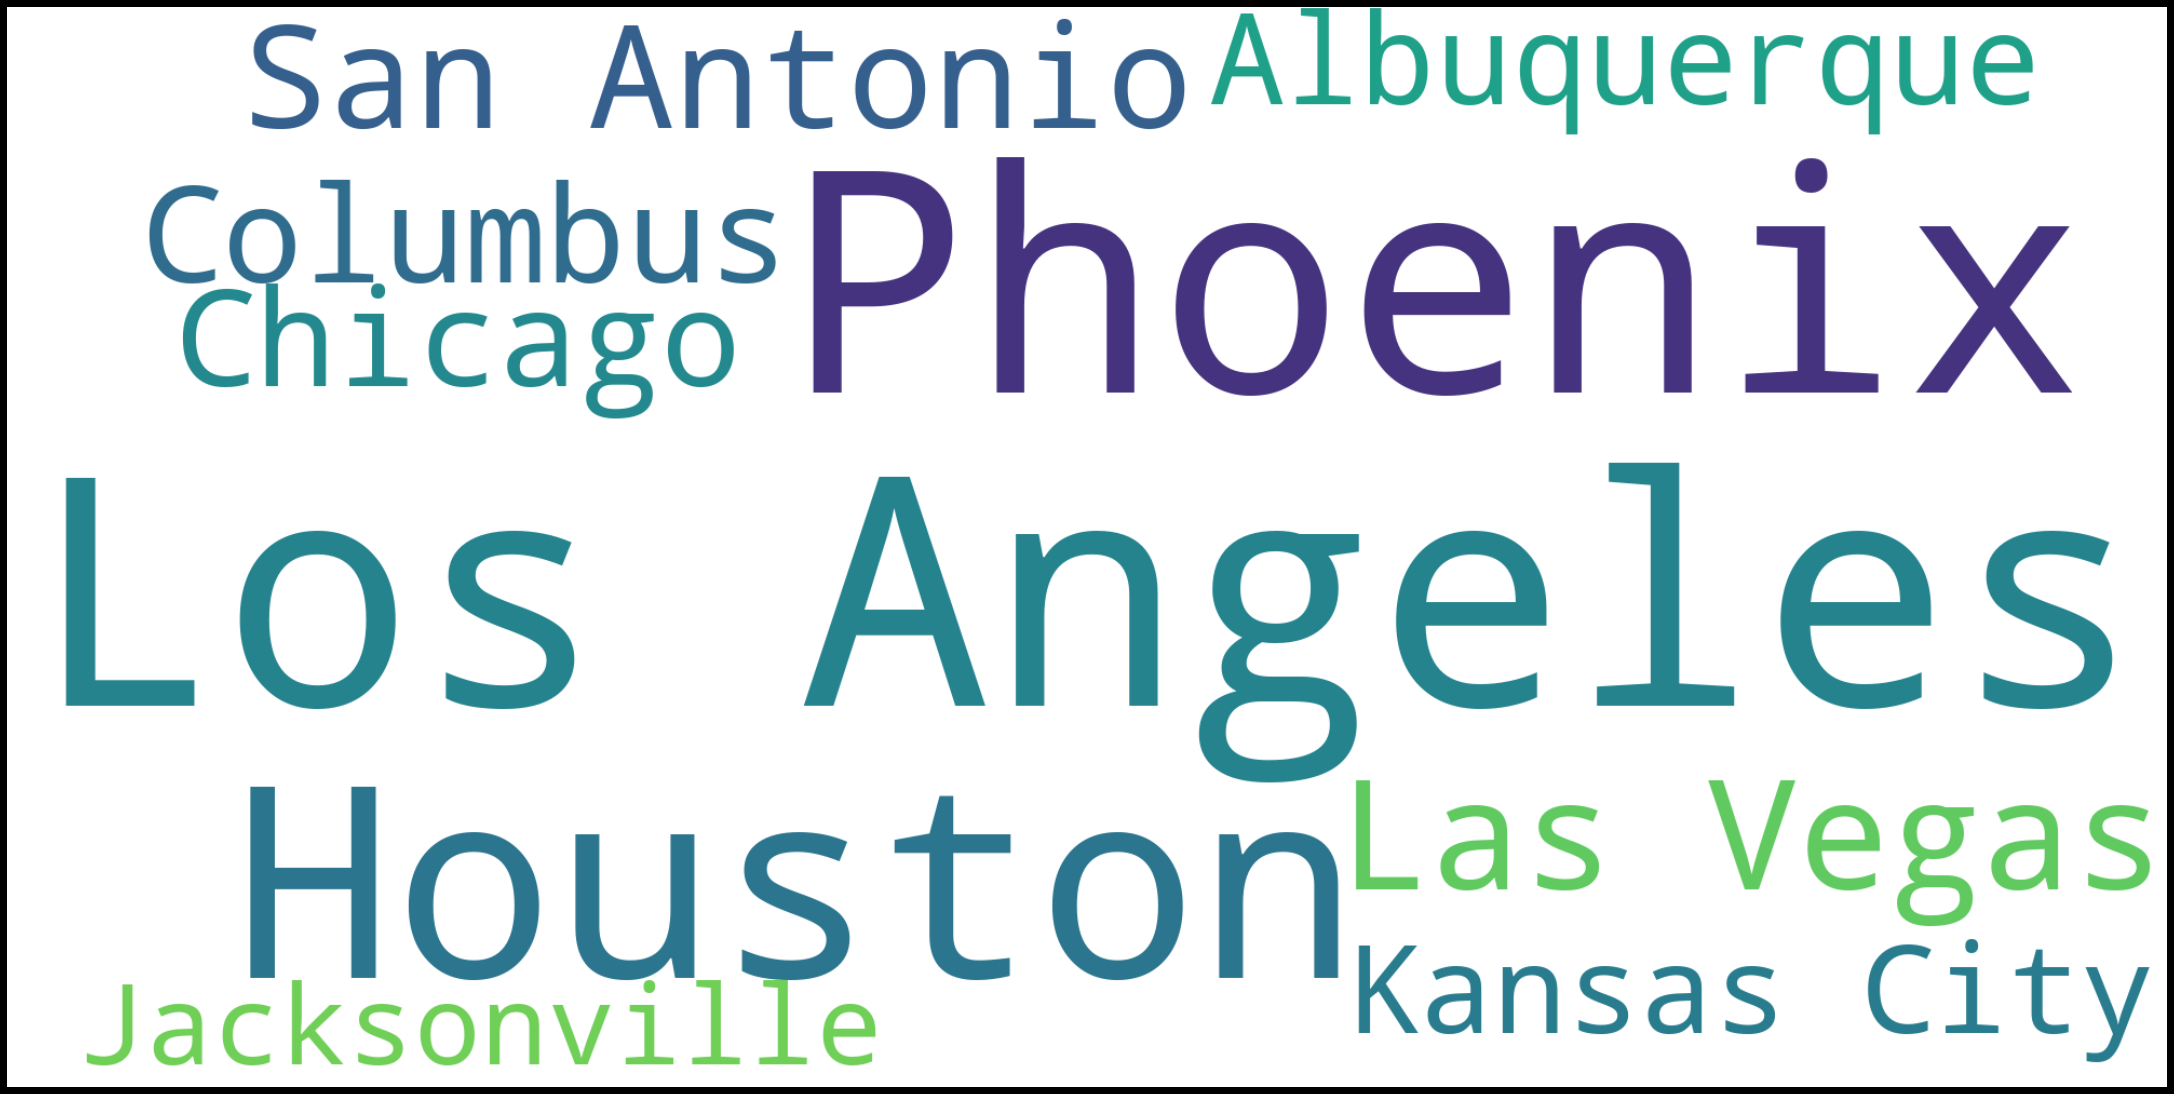

In [20]:
text_list = []
for i in range(len(shootings["city"])):
    text_list.append(str(shootings["city"][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'White',max_words=10).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As we have seen for the data until 2016, even in this data bounce up to 2020 Los Angeles and Houston were the bloodiest cities followed by Phoenix and Las Vegas.

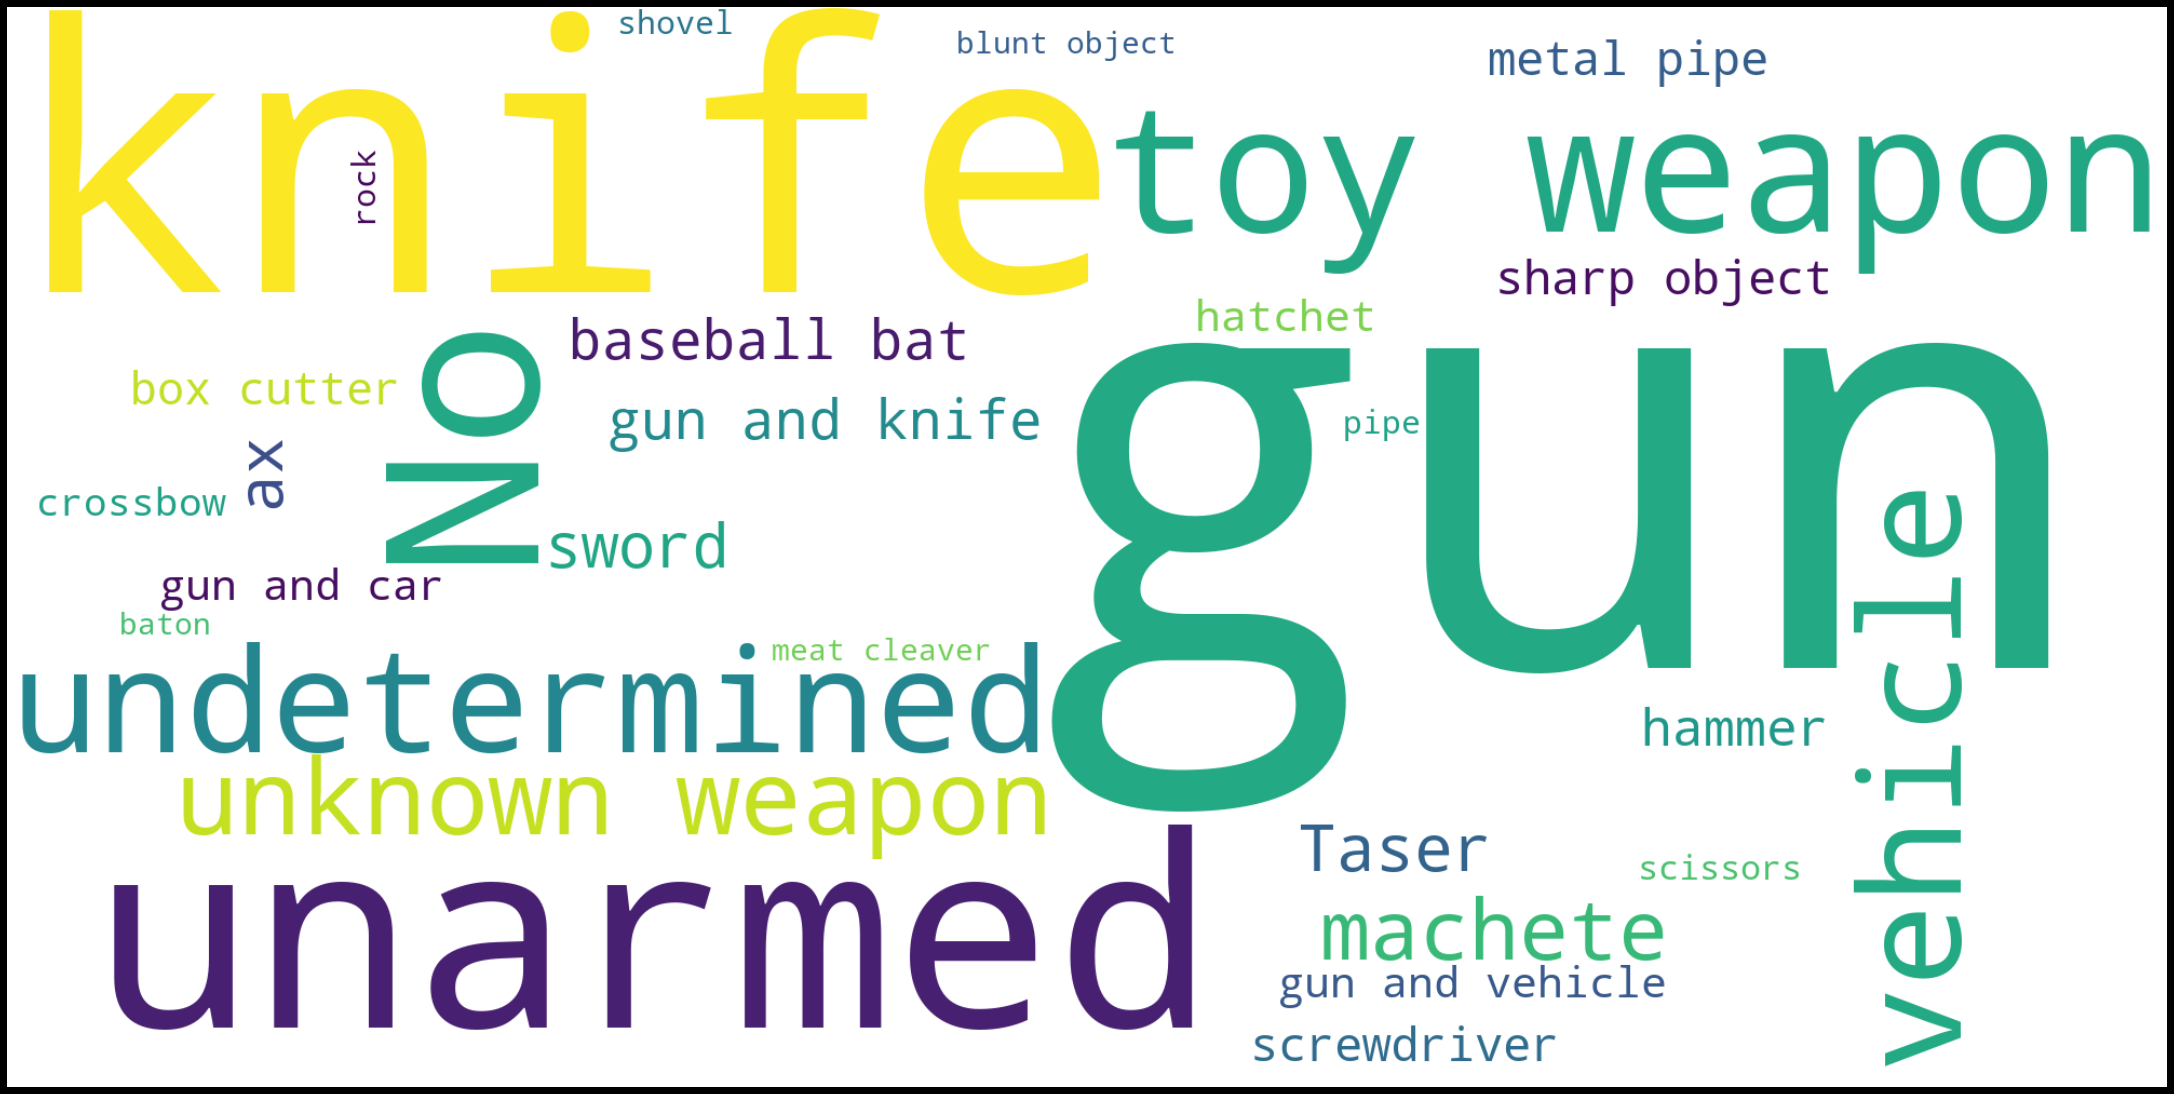

In [21]:
text_list = []
for i in range(len(shootings["armed"])):
    text_list.append(str(shootings["armed"][i]))

from collections import Counter
word_could_dict=Counter(text_list)

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'white',max_words=30).generate_from_frequencies(word_could_dict)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The people killed had a weapon as a gun mainly, but also knives or toy weapons. In many cases people were not armed or in any case no weapon was detected.